In [4]:
import torch
import torchvision
from torchvision import transforms

# 1. 定义图像转换
trans = transforms.ToTensor()

# 2. 下载并加载训练集
mnist_train = torchvision.datasets.FashionMNIST(
    root="../",        # 数据存放路径
    train=True,            # 训练集
    transform=trans,       # 使用ToTensor()将PIL图像转换为Tensor，这里是保证拿到的是Tensor而不是图片
    download=True          # 如无数据则自动下载
)

# 3. 下载并加载测试集
mnist_test = torchvision.datasets.FashionMNIST(
    root="../",
    train=False,           # 测试集
    transform=trans,
    download=True
)

# 4. 查看训练集和测试集的大小， 训练数据集中有6w张图片，测试数据集中有1w张图片
print(len(mnist_train), len(mnist_test))

# 5. 取出训练集中第一个样本，查看其形状
# mnist_train[i] 返回一个元组 (图像, 标签)
X, y = mnist_train[0]
print(X.shape)


100.0%
100.0%
100.0%
100.0%

60000 10000
torch.Size([1, 28, 28])


In [5]:
import torch
import matplotlib.pyplot as plt

def get_fashion_mnist_labels(labels):
    """将 Fashion-MNIST 数字标签转换为对应的文本标签。"""
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    # 将每个数字标签映射为对应的服饰名称
    # labels是一个list它有数字组成，这里的意思是让数字对影成对应的string类别
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """以网格形式展示多张图像。"""
    # 设置画布大小
    figsize = (num_cols * scale, num_rows * scale)

    # fig：创建一个画布（整张大图）
    # axes：这个画布上包含了多个“格子”，每个格子可以放一张图（比如 2 行 3 列）
    # figsize：控制画布的大小，单位是“英寸”（inch），会影响图片显示大小
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    print("type axes:")
    print(type(axes))

    print(fig)
    print(axes)
    # 将子图数组打平，便于逐一访问
    axes = axes.flatten()

    # 模拟例子理解：zip + enumerate
    # 假设你有：
    #
    # imgs = ['图像A', '图像B', '图像C']
    # axes = ['位置1', '位置2', '位置3']
    # 那：
    #
    # zip(axes, imgs)
    # 会变成：
    #
    # [('位置1', '图像A'), ('位置2', '图像B'), ('位置3', '图像C')]
    # 接着：
    #
    # enumerate(zip(axes, imgs))
    # 会变成：
    #
    # [(0, ('位置1', '图像A')),
    #  (1, ('位置2', '图像B')),
    #  (2, ('位置3', '图像C'))]
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        # 如果图像是 PyTorch 张量，则先转成 NumPy 数组
        if torch.is_tensor(img):
            img = img.numpy()

        # imshow 默认期望 (H, W, C) 或 (H, W)，若是单通道可能需要去掉通道维度
        ax.imshow(img, cmap='gray')

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

        # 如果提供了 titles，则为每张图设置标题
        if titles:
            ax.set_title(titles[i])

    plt.tight_layout()
    plt.show()
    return axes


X.shape: torch.Size([8, 1, 28, 28])
y.shape: torch.Size([8])
type axes:
<class 'numpy.ndarray'>
Figure(600x300)
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]


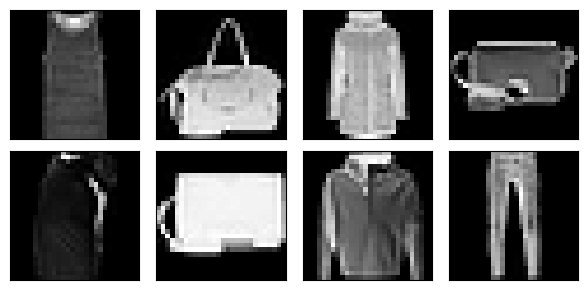

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

In [6]:
from torch.utils import data
# 3. 使用 DataLoader 来批量加载数据
batch_size = 8
train_iter = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

# 4. 从 DataLoader 中取出一个批次的样本
X, y = next(iter(train_iter))
print("X.shape:", X.shape)  # 通常是 [batch_size, 1, 28, 28]
print("y.shape:", y.shape)  # 通常是 [batch_size]

show_images(X.reshape(batch_size, 28, 28), 2, 4,
                titles=None)

In [7]:
import time

class Timer:
    def __init__(self):
        """初始化计时器，从创建时开始计时。"""
        self.start_time = time.time()

    def stop(self):
        """停止计时并返回从开始到现在的总时间（秒）。"""
        return time.time() - self.start_time

In [8]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程来读取数据。"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers())

timer = Timer()

# 可以检测数据读取的速度，读取速度也可能成为一个性能瓶颈
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'3.59 sec'

In [9]:
def load_data_fashion_mnist(batch_size, resize=None):
    """加载Fashion-MNIST数据集，分为训练集和测试集。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    mnist_train = torchvision.datasets.FashionMNIST(root='../',
                                                  train=True,
                                                  transform=trans,
                                                  download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root='../',
                                                  train=False,
                                                  transform=trans,
                                                  download=True)

    return (data.DataLoader(mnist_train, batch_size, num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, num_workers=get_dataloader_workers()))

In [10]:
# Softmax回归从零开始实现

import torch
from IPython import display

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# 因为图片尺寸为28*28=784。然后对应每一个输出值都需要有一个784维的w，总维度为（784，10）
num_inputs = 784
# 同理，对每个输出都需要一个偏移b
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)



In [11]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

# 测试softmax()方法
X = torch.normal(0,0.01,size = (2,5), )
X_prob = softmax(X)
# 形状保持不变，每一行代表一个样本对于5个标签的预测概率
print(X_prob)
# 每一行的概率值和为1
print(X_prob.sum(1))

def net(X):
    # 256 * 784
    return softmax(X.reshape(-1,W.shape[0])@W +b)


# 🔹 range(len(y_hat))
# 生成一个 [0, 1, ..., batch_size-1] 的索引列表，表示每一行的索引。
#
# 🔹 y_hat[range(len(y_hat)), y] 表示正确分类项的预测概率
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

def accuracy(y_hat, y):
    """计算预测正确的数量。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        # ✅ y_hat = y_hat.argmax(axis=1)
        # 对每一行取最大值的索引（也就是预测的类别）：
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

# 准确率（accuracy），也就是：
# 预测对的个数/总样本个数
# accuracy(y_hat, y) / len(y)

class Accumulator:
    """在n个变量上累加。"""
    def __init__(self, n):
        # 创建一个长度为 n 的列表，比如：
        # n = 2 → [0.0, 0.0]
        self.data = [0.0] * n

    def add(self, *args):
        # zip(self.data, args)：
        # 把两个列表打包成一一对应的对：
        # [0.0, 0.0], (3, 7) → [(0.0, 3), (0.0, 7)]
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度。"""
    if isinstance(net, torch.nn.Module):
        #
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 用来累加 [正确预测数, 总样本数]

    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())  # 添加正确数和样本数

    return metric[0] / metric[1]  # 返回准确率 = 正确 / 总数



# 测试随机参数的精度
evaluate_accuracy(net, test_iter)




tensor([[0.1999, 0.2023, 0.1980, 0.1990, 0.2009],
        [0.2015, 0.1996, 0.1996, 0.1991, 0.2001]])
tensor([1., 1.])


0.0611

In [19]:
def train_epoch_ch3(net, train_iter, loss, updater):
    """训练模型一个迭代周期（定义见第3章）。"""
    if isinstance(net, torch.nn.Module):
        net.train()  # 设置为训练模式
    metric = Accumulator(3)  # [累加loss, 预测正确数, 样本总数]

    for X, y in train_iter:
        y_hat = net(X)              # 前向传播
        l = loss(y_hat, y)          # 计算损失

        # 标准 PyTorch 优化器
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()     # 清空梯度
            l.backward()            # 反向传播
            updater.step()          # 更新参数
            # 你用的是 PyTorch 自带的 nn.CrossEntropyLoss() 或类似的 loss，它内部已经做了 .mean()，返回的是一个 标量张量。
            metric.add(
                float(l) * len(y),              # 累加loss（平均loss * 样本数）
                accuracy(y_hat, y),             # 累加正确预测数量
                y.numel()                       # 累加样本数
            )
        else:
            # 自定义优化器逻辑
            l.sum().backward()
            updater(X.shape[0])
            metric.add(
                float(l.sum()),
                accuracy(y_hat, y),
                y.numel()
            )
    # 第一个是 所有的loss累加/样本总数； 第二个是正确率
    return metric[0] / metric[2], metric[1] / metric[2]  # 返回平均loss和准确率


In [20]:
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats


# 设置 SVG 输出
def use_svg_display():
    """使用svg格式在Jupyter中显示图像（高清）"""
    set_matplotlib_formats('svg')

# 配置坐标轴函数
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴属性"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# 动态绘图类
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        """在一个图里动态绘制多条线"""
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes]
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        """添加数据点并更新图像"""
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if self.X is None:
            self.X = [[] for _ in range(n)]
        if self.Y is None:
            self.Y = [[] for _ in range(n)]
        if not hasattr(x, "__len__"):
            x = [x] * n
        for i, (a, b) in enumerate(zip(x, y)):
            self.X[i].append(a)
            self.Y[i].append(b)
        self.axes[0].cla()  # 清空当前 axes
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        """在一个图里动态绘制多条线"""
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes]
        # 配置坐标轴显示
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        """添加多个数据点到图中"""
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(self, 'X') or self.X is None:
            self.X = [[] for _ in range(n)]
        if not hasattr(self, 'Y') or self.Y is None:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x if hasattr(x, "__len__") else [x], y)):
            self.X[i].append(a)
            self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型并动态可视化 loss 和准确率"""
    # animator = Animator(
    #     xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 1],
    #     legend=['train loss', 'train acc', 'test acc']
    # )

    for epoch in range(num_epochs):
        # 训练一轮，返回平均 loss 和准确率
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)

        print(f"{train_metrics = }")

        # 在测试集上评估准确率
        test_acc = evaluate_accuracy(net, test_iter)

        print(f"{test_acc = }")

        # 动态添加数据（x轴为 epoch，y轴为3条曲线）
        # animator.add(epoch + 1, train_metrics + (test_acc,))

        # 可选：记录最后一轮结果
        train_loss, train_acc = train_metrics

    # display.display(animator.fig)






In [14]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            # 这里的/ batch_size其实是一个标量，让learning rate不随着batch size的变化而变化
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.1

def updater(batch_size):
    return sgd([W, b], lr, batch_size)

num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)





l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.sum(): torch.Size([])
l.shape: torch.Size([256])
l.su

KeyboardInterrupt: 

In [21]:
# softmax回归简洁实现
import torch
from torch import nn

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# 定义一个简单的网络：Flatten + Linear
net = nn.Sequential(
    nn.Flatten(),              # 把输入从 (batch, 1, 28, 28) 拉平成 (batch, 784)
    nn.Linear(784, 10)         # 全连接层：784 → 10（分类输出）
)

# 初始化权重：仅对 Linear 层进行处理
def init_weights(m):

    # 判断是否是 nn.Linear
    # 如果是，就将它的权重初始化为 均值 0，标准差 0.01 的正态分布
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# 应用初始化
# 这是一个初始化函数，你通过 net.apply() 会对 net 中的每一层 m 执行这个函数：
net.apply(init_weights)

loss = nn.CrossEntropyLoss()

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 10

# 参数
# 1. 前向传播
# 2. 训练迭代器
# 3. 测试迭代器
# 4. 损失函数
# 5. 更新器(随机梯度下降)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.Size([])
l.shape: torch.Size([])
l.sum(): torch.S